<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/fbprophet_PJT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
apt2016 = pd.DataFrame(pd.read_csv('./apt_2016_17.csv'))
apt2017 = pd.DataFrame(pd.read_csv('./apt_2017_18.csv'))
apt2018 = pd.DataFrame(pd.read_csv('./apt_2018_19.csv'))
apt2019 = pd.DataFrame(pd.read_csv('./apt_2019_20.csv'))
apt2020 = pd.DataFrame(pd.read_csv('./apt_2020_21.csv'))

In [3]:
apt2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109102 entries, 0 to 109101
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       109102 non-null  object 
 1   번지        109091 non-null  object 
 2   본번        109093 non-null  float64
 3   부번        109093 non-null  float64
 4   단지명       109102 non-null  object 
 5   전용면적(㎡)   109102 non-null  float64
 6   계약년월      109102 non-null  int64  
 7   계약일       109102 non-null  int64  
 8   거래금액(만원)  109102 non-null  int64  
 9   층         109102 non-null  int64  
 10  건축년도      109102 non-null  int64  
 11  도로명       109102 non-null  object 
 12  해제사유발생일   0 non-null       float64
dtypes: float64(4), int64(5), object(4)
memory usage: 10.8+ MB


In [4]:
apt2017

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201704,19,85000,2,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201707,8,89900,1,1988,언주로 103,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201704,13,97500,4,1987,언주로 3,NaN
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201704,17,98000,1,1987,언주로 3,NaN
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201705,16,98000,1,1987,언주로 3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118209,서울특별시 중랑구 중화동,274-75,274.0,75.0,한영(102),72.22,201711,18,28300,4,2003,동일로144길 74,NaN
118210,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),125.09,201705,29,36900,6,2003,동일로144길 74,NaN
118211,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),50.29,201708,17,19100,5,2003,동일로144길 74,NaN
118212,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),87.31,201708,28,30500,6,2003,동일로144길 74,NaN


In [5]:
apt = apt2016

In [6]:
apt = apt.append([apt2017, apt2018, apt2019, apt2020], sort = False)
# apt.append(apt2018, sort = False)
# apt.append(apt2019, sort = False)
# apt.append(apt2020, sort = False)

In [7]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450907 entries, 0 to 78545
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       450907 non-null  object 
 1   번지        450709 non-null  object 
 2   본번        450846 non-null  float64
 3   부번        450846 non-null  float64
 4   단지명       450907 non-null  object 
 5   전용면적(㎡)   450907 non-null  float64
 6   계약년월      450907 non-null  int64  
 7   계약일       450907 non-null  int64  
 8   거래금액(만원)  450907 non-null  int64  
 9   층         450907 non-null  int64  
 10  건축년도      450907 non-null  int64  
 11  도로명       450907 non-null  object 
 12  해제사유발생일   3464 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 48.2+ MB


In [8]:
from datetime import datetime, timedelta

In [9]:
apt.계약년월 = apt.계약년월.astype(str).apply(lambda s: s[:4] + '-' + s[4:])

In [10]:
apt.계약년월

0        2016-04
1        2016-05
2        2016-05
3        2016-12
4        2017-03
          ...   
78541    2020-08
78542    2020-07
78543    2020-12
78544    2020-09
78545    2020-09
Name: 계약년월, Length: 450907, dtype: object

In [11]:
apt.계약일 = apt.계약일.astype(str)

In [12]:
apt['fulldate'] = apt["계약년월"].map(str) + "-" + apt["계약일"]

In [13]:
apt.fulldate = pd.to_datetime(apt['fulldate'])

In [14]:
apt = apt.sort_values(by='fulldate')

In [15]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450907 entries, 23397 to 24951
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   시군구       450907 non-null  object        
 1   번지        450709 non-null  object        
 2   본번        450846 non-null  float64       
 3   부번        450846 non-null  float64       
 4   단지명       450907 non-null  object        
 5   전용면적(㎡)   450907 non-null  float64       
 6   계약년월      450907 non-null  object        
 7   계약일       450907 non-null  object        
 8   거래금액(만원)  450907 non-null  int64         
 9   층         450907 non-null  int64         
 10  건축년도      450907 non-null  int64         
 11  도로명       450907 non-null  object        
 12  해제사유발생일   3464 non-null    float64       
 13  fulldate  450907 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 51.6+ MB


In [16]:
apt_df = apt.drop(['번지','본번','부번','단지명','전용면적(㎡)','층','건축년도','도로명','해제사유발생일'], axis = 1)

In [17]:
apt_df.columns = ['place','con_date','con_day','price','fulldate']

In [18]:
apt_df.fulldate.value_counts()

2020-06-13    1295
2018-08-25    1152
2020-06-16    1095
2020-06-27    1088
2020-07-04    1001
              ... 
2019-02-05       2
2017-01-28       2
2017-10-04       1
2020-10-02       1
2020-10-01       1
Name: fulldate, Length: 1826, dtype: int64

In [19]:
apt_df["fulldate"].dt.month

23397     4
108505    4
72694     4
33321     4
5130      4
         ..
6545      3
966       3
965       3
53502     3
24951     3
Name: fulldate, Length: 450907, dtype: int64

In [20]:
# apt_df.to_csv('apt_df.csv')

In [21]:
apt_lstm1 = apt_df.groupby('fulldate')['price'].agg(**{'mean_price':'mean'}).reset_index()

In [22]:
apt_lstm = apt_df.groupby('fulldate')['price'].agg(**{'median_price':'median'}).reset_index()

In [23]:
apt_group = apt_df.groupby('con_date')['price'].agg(**{'mean_price':'mean'}).reset_index()

In [24]:
apt_group['con_date'] = pd.to_datetime(apt_group.con_date)

In [25]:
apt_group

,con_date,mean_price
0,2016-04-01,53665.162660
1,2016-05-01,55910.395086
2,2016-06-01,54816.095642
3,2016-07-01,52815.155087
4,2016-08-01,55442.916720
5,2016-09-01,56569.600124
6,2016-10-01,55966.206965
7,2016-11-01,52360.432611
8,2016-12-01,54961.550071
9,2017-01-01,53921.015245


In [26]:
# apt_lstm.to_csv('apt_season.csv')

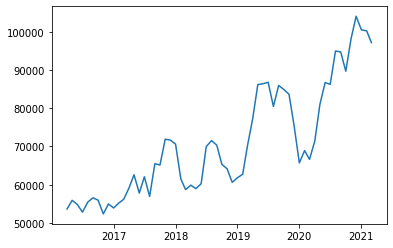

In [27]:
from matplotlib import pyplot as plt
plt.plot(apt_group.con_date, apt_group.mean_price)
plt.show()

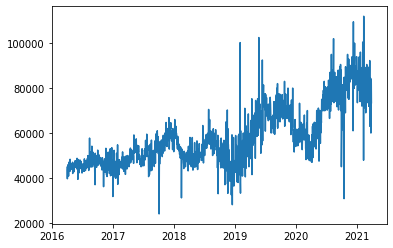

In [28]:
plt.plot(apt_lstm.fulldate, apt_lstm.median_price)
plt.show()

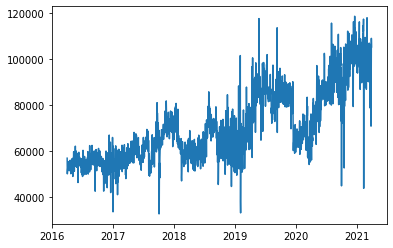

In [29]:
plt.plot(apt_lstm1.fulldate, apt_lstm1.mean_price)
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
df = apt_lstm

In [32]:
df

,fulldate,median_price
0,2016-04-01,44750.0
1,2016-04-02,43250.0
2,2016-04-03,39650.0
3,2016-04-04,43500.0
4,2016-04-05,44250.0
...,...,...
1821,2021-03-27,83000.0
1822,2021-03-28,60000.0
1823,2021-03-29,72750.0
1824,2021-03-30,83800.0


In [33]:
df = apt_lstm['median_price'].values.reshape(-1,1)

In [34]:
df

array([[44750.],
       [43250.],
       [39650.],
       ...,
       [72750.],
       [83800.],
       [73500.]])

In [35]:

scale_cols = ['fulldate', 'median_price']
# df.columns = scale_cols

scaler = MinMaxScaler()
scale_cols = ['mean_price']
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,mean_price
0,0.235849
1,0.218800
2,0.177881
3,0.221641
4,0.230166
...,...
1821,0.670607
1822,0.409184
1823,0.554103
1824,0.679700


In [36]:
df_scaled['fulldate'] = apt_lstm['fulldate']

In [37]:
dataset = apt_lstm.set_index('fulldate')

In [38]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(dataset['median_price'])

1. ADF :  -1.3145837532890547
2. P-Value :  0.6224740990221669
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression: 1802
5. Critical Values :
	 1% :  -3.4339840952648695
	 5% :  -2.8631452508003057
	 10% :  -2.567624583142913


In [65]:
# pip install pmdarima

     |████████████████████████████████| 1.5 MB 35.5 MB/s 
     |████████████████████████████████| 9.5 MB 46.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [39]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(dataset['median_price'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=36581.475, Time=2.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=37561.355, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=37155.707, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36590.061, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=37559.364, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36590.941, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=36587.843, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=36583.996, Time=2.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=36554.306, Time=2.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=36589.048, Time=1.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=36558.279, Time=2.59 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=36557.970, Time=2.35 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=36585.243, Time=2.16 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=36559.664, Time=4.11 sec
 ARIMA(2,1,3)(0,0,0

In [41]:
# print(df.shape)
train=dataset.iloc[:-30]
test=dataset.iloc[-30:]
print(train.shape,test.shape)

(1796, 1) (30, 1)


In [42]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['median_price'],order=(2,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.median_price   No. Observations:                 1795
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -17945.519
Method:                       css-mle   S.D. of innovations           5314.302
Date:                Thu, 12 Aug 2021   AIC                          35905.039
Time:                        05:43:37   BIC                          35943.488
Sample:                    04-02-2016   HQIC                         35919.234
                         - 03-01-2021                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.5242     17.956      1.143      0.253     -14.670      55.718
ar.L1.D.median_price    -0.7287      0.056    -13.066      0.000      -0.838      -0.619
ar.L2.D.median_price    -0.8723      0.047    -18.646      0.000      -0.964      -0.781
ma.L1.D.median_price    -0.0929      0.062     -1.498      0.134      -0.214       0.029
ma.L2.D.median_price     0.1707      0.050      3.422      0.001       0.073       0.268
ma.L3.D.median_price    -0.7067      0.051    -13.823      0.000      -0.807      -0.607
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4177           -0.9859j            1.0707           -0.3138
AR.2           -0.4177           +0.9859j            1.0707            0.3138
MA.1           -0.4629           -0.9989j            1.1010           -0.3191
MA.2           -0.4629           +0.9989j            1.1010            0.3191
MA.3            1.1673           -0.0000j            1.1673           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['median_price'].plot(legend=True)

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['median_price'].mean()
rmse=sqrt(mean_squared_error(pred,test['median_price']))
print(rmse)

7703.445520903378


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(apt_lstm.median_price)
plot_pacf(apt_lstm.median_price)
plt.show()

In [ ]:
diff_1=apt_lstm.median_price.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [54]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(apt_lstm.median_price, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.median_price   No. Observations:                 1825
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -18280.674
Method:                       css-mle   S.D. of innovations           5418.091
Date:                Thu, 12 Aug 2021   AIC                          36565.348
Time:                        05:29:00   BIC                          36576.367
Sample:                             1   HQIC                         36569.413
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
ma.L1.D.median_price    -0.8609      0.011    -77.322      0.000      -0.883      -0.839
                                    Roots                                    
                  Real 

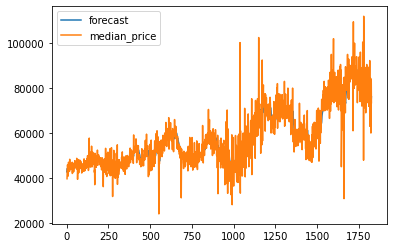

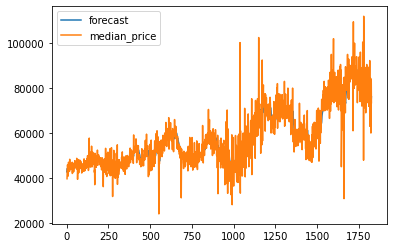

In [55]:
model_fit.plot_predict()

In [56]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([75755.97440041]), array([5418.09083053]), array([[65136.7115076 , 86375.23729322]]))


In [48]:
TEST_SIZE = 1600
WINDOW_SIZE = 100

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [49]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['full']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

In [47]:
pip install fbprophet

In [54]:
import fbprophet
print(fbprophet.__version__)

0.7.1


In [59]:
from fbprophet import Prophet
model = Prophet(daily_seasonality=True)

In [62]:
apt_lstm.columns = ['ds', 'y']

In [63]:
model.fit(apt_lstm)

Exception: ignored

In [64]:
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

In [66]:
forecast = model.predict(last_1year)

In [68]:
from matplotlib import pyplot


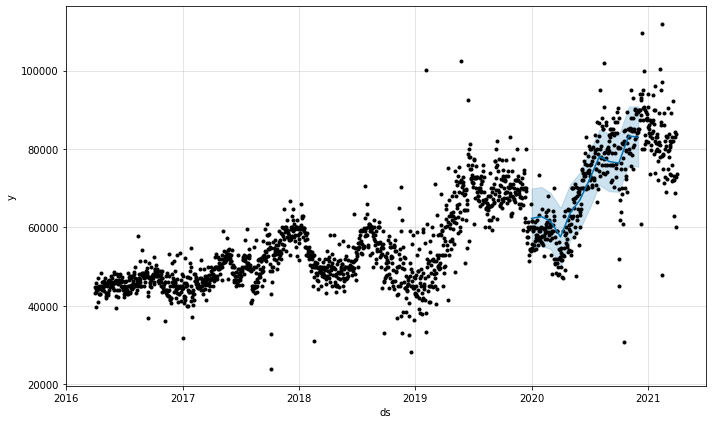

In [69]:
model.plot(forecast)
pyplot.show()

In [72]:
# train set 이후 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2021-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

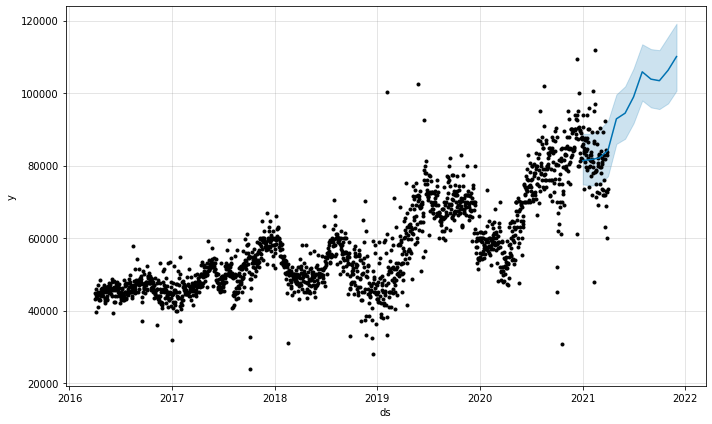

In [73]:
forecast = model.predict(last_1year)
model.plot(forecast)
pyplot.show()

In [123]:
last_1year = pd.date_range('03/02/2021', '03/31/2021').values.reshape(-1,1)

In [124]:
last_1year

array([['2021-03-02T00:00:00.000000000'],
       ['2021-03-03T00:00:00.000000000'],
       ['2021-03-04T00:00:00.000000000'],
       ['2021-03-05T00:00:00.000000000'],
       ['2021-03-06T00:00:00.000000000'],
       ['2021-03-07T00:00:00.000000000'],
       ['2021-03-08T00:00:00.000000000'],
       ['2021-03-09T00:00:00.000000000'],
       ['2021-03-10T00:00:00.000000000'],
       ['2021-03-11T00:00:00.000000000'],
       ['2021-03-12T00:00:00.000000000'],
       ['2021-03-13T00:00:00.000000000'],
       ['2021-03-14T00:00:00.000000000'],
       ['2021-03-15T00:00:00.000000000'],
       ['2021-03-16T00:00:00.000000000'],
       ['2021-03-17T00:00:00.000000000'],
       ['2021-03-18T00:00:00.000000000'],
       ['2021-03-19T00:00:00.000000000'],
       ['2021-03-20T00:00:00.000000000'],
       ['2021-03-21T00:00:00.000000000'],
       ['2021-03-22T00:00:00.000000000'],
       ['2021-03-23T00:00:00.000000000'],
       ['2021-03-24T00:00:00.000000000'],
       ['2021-03-25T00:00:00.00000

In [120]:
apt_lstm[-30:].values

array([[Timestamp('2021-03-02 00:00:00'), 83000.0],
       [Timestamp('2021-03-03 00:00:00'), 90500.0],
       [Timestamp('2021-03-04 00:00:00'), 75000.0],
       [Timestamp('2021-03-05 00:00:00'), 79500.0],
       [Timestamp('2021-03-06 00:00:00'), 83900.0],
       [Timestamp('2021-03-07 00:00:00'), 79750.0],
       [Timestamp('2021-03-08 00:00:00'), 78000.0],
       [Timestamp('2021-03-09 00:00:00'), 82000.0],
       [Timestamp('2021-03-10 00:00:00'), 73500.0],
       [Timestamp('2021-03-11 00:00:00'), 81000.0],
       [Timestamp('2021-03-12 00:00:00'), 80500.0],
       [Timestamp('2021-03-13 00:00:00'), 81750.0],
       [Timestamp('2021-03-14 00:00:00'), 89250.0],
       [Timestamp('2021-03-15 00:00:00'), 73250.0],
       [Timestamp('2021-03-16 00:00:00'), 71875.0],
       [Timestamp('2021-03-17 00:00:00'), 83000.0],
       [Timestamp('2021-03-18 00:00:00'), 76000.0],
       [Timestamp('2021-03-19 00:00:00'), 72000.0],
       [Timestamp('2021-03-20 00:00:00'), 81950.0],
       [Time

In [134]:
# 마지막 12개월 제외시키기
train = apt_lstm.drop(apt_lstm.index[-30:])
y_true = apt_lstm['y'][-30:].values

# 모델 생성 후 학습
model = Prophet(daily_seasonality=0.005, 
                weekly_seasonality=1000,
                yearly_seasonality=10,
                seasonality_mode='multiplicative',
                holidays_prior_scale=150)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_country_holidays(country_name="KR")

model.fit(train)

# train set 마지막 1년 날짜 생성
# last_1year = list()
# for i in range(1, 13):
#     last_1year.append(['2019-%03d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

# 예측하고 비교하기
# 여기에서는 MAE를 살펴본다.
forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 5255.378


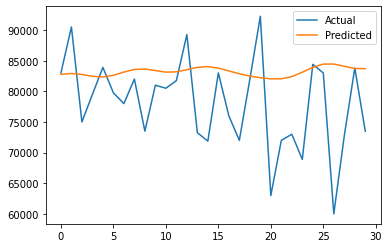

In [133]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [88]:
pip install pytimekr

  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7941 sha256=2b63a784dddc696b0be835e1789c78f24a48fbc86c47e3f3f5f9e2a4f0b022ff
  Stored in directory: /root/.cache/pip/wheels/7c/54/31/d099bce210ce51c45eeb97e149699dedc66c78eb84c01be9c2
Successfully built pytimekr


In [91]:
pip install holidays

In [92]:
import holidays

In [ ]:
us_holidays = holidays.KR()